#**Logistic Regression**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. 

It’s a classification algorithm, that is used where the response variable is categorical. The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.

***Why Logistic, not Linear?***

With binary classification, let ‘x’ be some feature and ‘y’ be the output which can be either 0 or 1.
The probability that the output is 1 given its input can be represented as:

If we predict the probability via linear regression, we can state it as:

where, *p(x) = p(y=1|x)*

Linear regression model can generate the predicted probability as any number ranging from negative to positive infinity, whereas probability of an outcome can only lie between 0< P(x)<1.

##**1-Binary**

Binary or binomial classification: exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x, y)

model.classes_
model.intercept_
model.coef_

model.predict_proba(x)

model.predict(x)

model.score(x, y)

0.9

In [ ]:
# Another Example
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')
print('p_pred:', p_pred, sep='\n', end='\n\n')
print('report:', report, sep='\n')

intercept: [-1.51632619]
coef: [[0.703457]]

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



##**2-Multiclass**

Multiclass or multinomial classification: three or more classes of the outputs to choose from


In [ ]:
# Handwriting Recognition
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x, y = load_digits(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# 'ovr' says to make the binary fit for each class.
# 'multinomial' says to apply the multinomial loss fit.
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
model.fit(x_train, y_train)

x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)
model.score(x_test, y_test)
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

##**3-Evaluation**


###**Confusion Matrix (Binary)**

***precision(Sensitivity)*** = 
(TP) / (TP+FP)

***recall(Specificity,Positive-Prediction-Value)***
 = (TP) / (TP+FN)

####**Confusion-Matrix**
We want to predict some data using Classification in Machine Learning.

Let the classifier be SVM, Decision Tree, Random Forest, Logistic Rgression, and so on.

What are the observations? In each classifier, we get both right as well as wrong predictions.

Wrong predictions can again be categorized into:-
* False Positive
* False Negative

***False Positive (type I error)***

When we predict that something happens/occurs and it didn't happened/occured.(rejection of a true null hypothesis) Example :- We predict that an earthquake would occur which didn't happen.

***False Negative (type II error)***

When we predict that something won't happen/occur but it happens/occurs.(non-rejection of a false null hypothesis) Example :- We predict that there might be no earthquake but there occurs an earthquake.

Usually, type I errors are considered to be not as critical as type II errors.

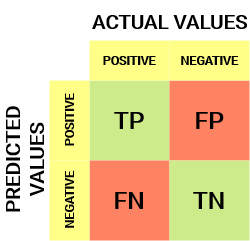

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

###**Confusion Matrix (Mutliclass)**

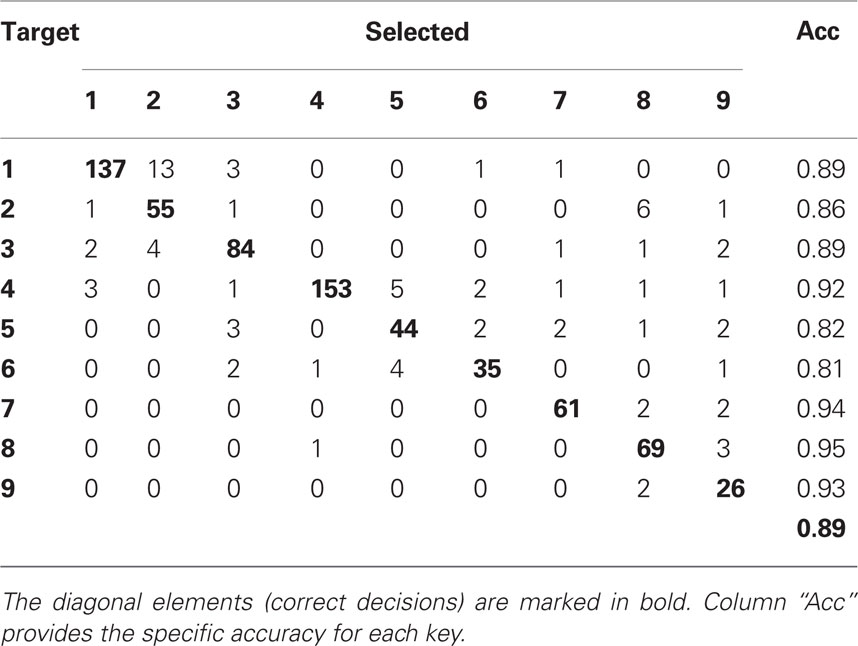

I would like to find the number of misclassified items. In the first row, there are 137 examples of class 1 that were classified as class 1, and 13 examples of class 1 that were classified as class 2. How to get this number?

In [ ]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array([[1, 0, 1],
                   [0, 1, 0]])
y_pred = np.array([[1, 0, 0],
                   [0, 1, 1]])
multilabel_confusion_matrix(y_true, y_pred)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[0, 1],
        [1, 0]]])

###**F-1**

F1 Score

It is a harmonic mean between recall and precision. Its range is [0,1]. This metric usually tells us how precise (It correctly classifies how many instances) and robust (does not miss any significant number of instances) our classifier is.

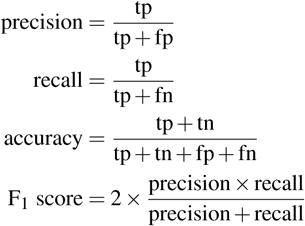

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average='macro')

0.26666666666666666

###**F-Beta**

F-BetaScore The Fbeta-measure is a generalization of the F-measure that adds a configuration parameter called beta. A default beta value is 1.0, which is the same as the F-measure. A smaller beta value, such as 0.5, gives more weight to precision and less to recall, whereas a larger beta value, such as 2.0, gives less weight to precision and more weight to recall in the calculation of the score.

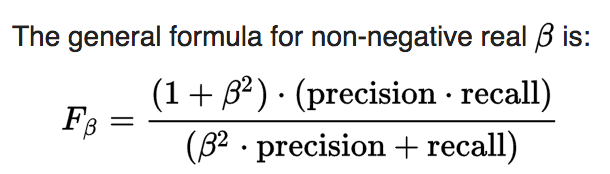

In [ ]:
from sklearn.metrics import fbeta_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
fbeta_score(y_true, y_pred, average='macro', beta=0.5)

0.23809523809523805

###**Cohen Kappa**

Cohen's kappa coefficient is a statistic which measures inter-rater agreement for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, since k takes into account the agreement occurring by chance. Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.

Cohen's kappa coefficient is defined and given by the following function:

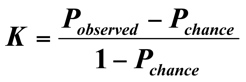

###**ROC & AUC Curve**

***ROC curve***

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

False Positive Rate (FPR) is defined as follows:

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

ROC Curve showing TP Rate vs. FP Rate at different classification thresholds.
Figure 4. TP vs. FP rate at different classification thresholds.

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.


***AUC: Area Under the ROC Curve***

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC (Area under the ROC Curve).
Figure 5. AUC (Area under the ROC Curve).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

Positive and negative examples ranked in ascending order of logistic regression score
Figure 6. Predictions ranked in ascending order of logistic regression score.

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.
However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.

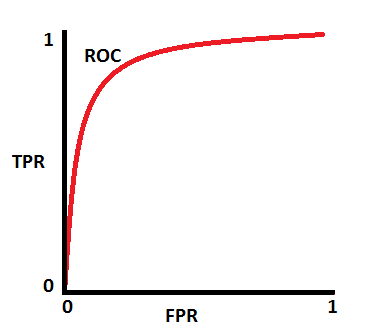

In [ ]:
# Binary
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.994767718408118

In [ ]:
# Multiclass
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9913333333333334